Student No.: 150659
Name: Kyle Waweru
Group: ICS 3B

Import dataset

In [2]:
from google.colab import drive
drive.mount ('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [7]:
price_dataset = pd.read_csv('/content/drive/MyDrive/price_dataset.csv')
price_dataset.head()

,LOC,FUR,AMB,PROX_SCH,PROX_ROAD,PROX_MALL,WATER,HK_SER,SIZE,PRICE
0,karen,yes,serene,no,yes,yes,yes,yes,32.502345,31.707006
1,madaraka,yes,semi_serene,yes,yes,yes,no,no,53.426804,68.777596
2,karen,no,noisy,no,yes,yes,yes,yes,61.530358,62.562382
3,karen,yes,semi_serene,no,no,no,yes,yes,47.475640,71.546632
4,buruburu,no,semi_serene,no,yes,yes,yes,yes,59.813208,87.230925


Data cleaning

In [9]:
price_data = price_dataset[['SIZE', 'PRICE']]
price_data.head()

,SIZE,PRICE
0,32.502345,31.707006
1,53.426804,68.777596
2,61.530358,62.562382
3,47.475640,71.546632
4,59.813208,87.230925


In [10]:
# Check for missing values
print(price_data.isnull().sum())

SIZE     0
PRICE    0
dtype: int64


Data visualization

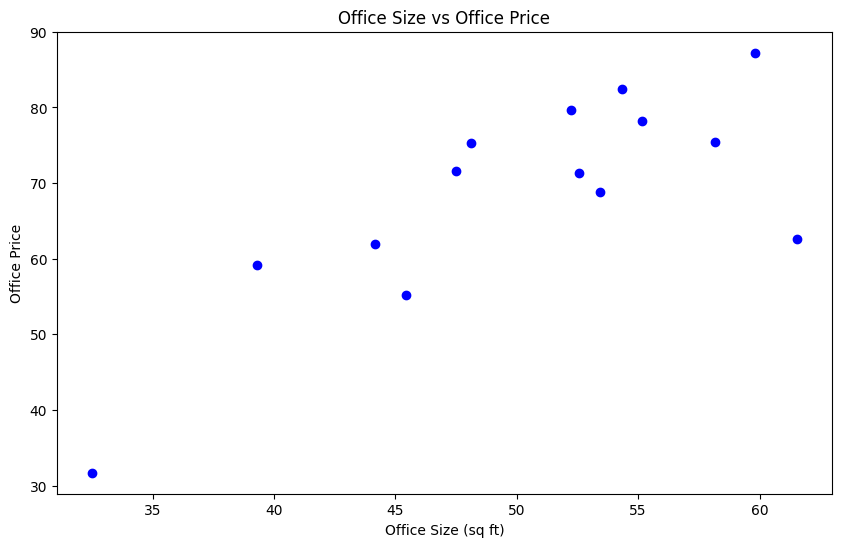

In [11]:
# Scatter plot of SIZE vs PRICE
plt.figure(figsize=(10, 6))
plt.scatter(price_data['SIZE'], price_data['PRICE'], color='blue')
plt.title("Office Size vs Office Price")
plt.xlabel("Office Size (sq ft)")
plt.ylabel("Office Price")
plt.show()

Model preparation

In [12]:
# Define Mean Squared Error Function
def mean_squared_error(y_true, y_pred):
    return np.mean((y_true - y_pred) ** 2)

In [13]:
# Define Gradient Descent Function
def gradient_descent(x, y, m, c, learning_rate):
    n = len(x)
    y_pred = m * x + c
    error = y_pred - y
    dm = (2/n) * sum(x * error)
    dc = (2/n) * sum(error)
    m -= learning_rate * dm
    c -= learning_rate * dc
    return m, c

In [14]:
# Convert data to numpy arrays
x = price_data['SIZE'].values
y = price_data['PRICE'].values

In [15]:
# Initialize parameters
m = np.random.rand()
c = np.random.rand()
learning_rate = 0.0001
epochs = 10

In [16]:
# Train the model
for epoch in range(epochs):
    m, c = gradient_descent(x, y, m, c, learning_rate)
    y_pred = m * x + c
    mse = mean_squared_error(y, y_pred)
    print(f"Epoch {epoch+1}/{epochs}, MSE: {mse:.4f}")

Epoch 1/10, MSE: 270.8515
Epoch 2/10, MSE: 120.4693
Epoch 3/10, MSE: 85.5732
Epoch 4/10, MSE: 77.4755
Epoch 5/10, MSE: 75.5965
Epoch 6/10, MSE: 75.1604
Epoch 7/10, MSE: 75.0592
Epoch 8/10, MSE: 75.0358
Epoch 9/10, MSE: 75.0303
Epoch 10/10, MSE: 75.0291


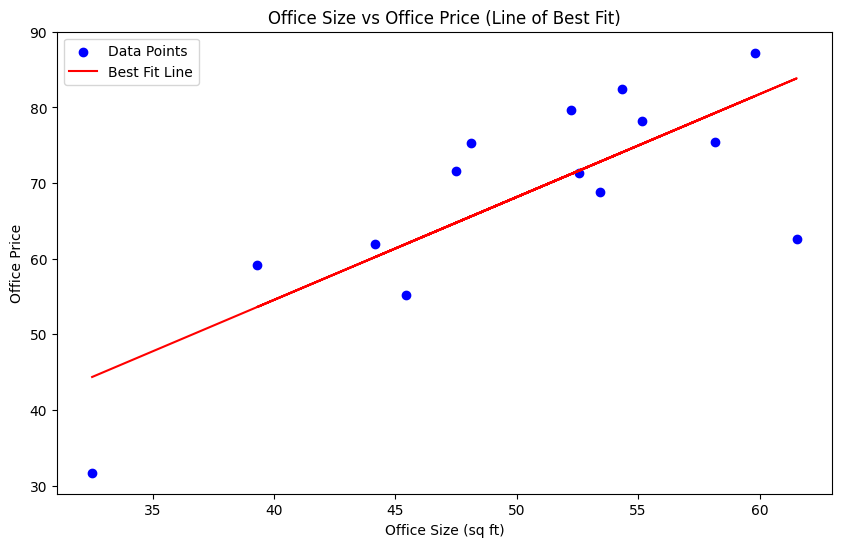

In [17]:
# Plot the line of best fit
plt.figure(figsize=(10, 6))
plt.scatter(x, y, color='blue', label="Data Points")
plt.plot(x, y_pred, color='red', label="Best Fit Line")
plt.title("Office Size vs Office Price (Line of Best Fit)")
plt.xlabel("Office Size (sq ft)")
plt.ylabel("Office Price")
plt.legend()
plt.show()

In [18]:
# Predict the price for a 100 sq. ft office
office_size = 100
predicted_price = m * office_size + c
print(f"\nPredicted price for a 100 sq. ft office: {predicted_price:.2f}")


Predicted price for a 100 sq. ft office: 136.16
